In [12]:
import pandas as pd
import numpy as np
import math
from statistics import mean,stdev,variance
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn import preprocessing
import seaborn as sns
import matplotlib.ticker as ticker
import os

pd.set_option('display.max_rows', 600)

dirName = 'convergence_plots'
os.makedirs(dirName)

In [13]:
## the _all files are array of 4: delta_avg, delta_max, delta_max_last50, final_position
sphere_all=joblib.load('convergence pickle files/sphere_all.pkl')
rosen_all=joblib.load('convergence pickle files/rosen_all.pkl')
rastrigin_all=joblib.load('convergence pickle files/rastrigin_all.pkl')
griewank_all=joblib.load('convergence pickle files/griewank_all.pkl')
schaffer_all=joblib.load('convergence pickle files/schaffer_all.pkl')



## Plotting samples for different types of graph (Chapter 5.3.1.)

In [14]:
os.makedirs("convergence_plots/sample_plots/")

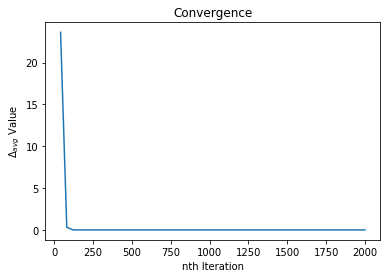

In [15]:
plt.plot(np.array(range(40,2040,40)),sphere_all[0][1][4])
plt.title("Convergence")
plt.xlabel("nth Iteration")
plt.ylabel("$\Delta_{avg}$ Value")
plt.savefig("convergence_plots/sample_plots/convergence.png")



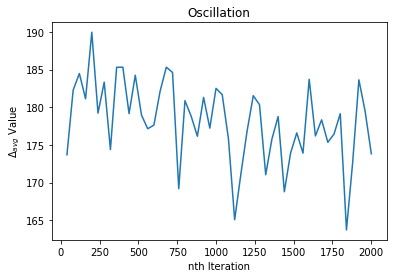

In [18]:
plt.plot(np.array(range(40,2040,40)),sphere_all[0][9][37])
plt.title("Oscillation")
plt.xlabel("nth Iteration")
plt.ylabel("$\Delta_{avg}$ Value")
plt.savefig("convergence_plots/sample_plots/oscillation.png")

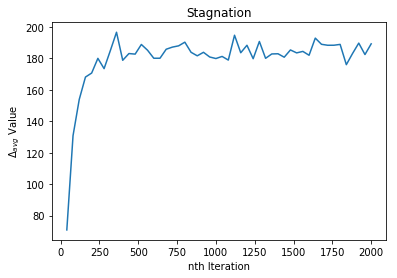

In [19]:
plt.plot(np.array(range(40,2040,40)),sphere_all[0][10][12])
plt.title("Stagnation")
plt.xlabel("nth Iteration")
plt.ylabel("$\Delta_{avg}$ Value")
plt.savefig("convergence_plots/sample_plots/stagnation.png")



## Saving 12 x 45 Plots

In [20]:
os.makedirs("convergence_plots/original_plots/")
os.makedirs("convergence_plots/original_plots/Sphere")
os.makedirs("convergence_plots/original_plots/Rosenbrock")
os.makedirs("convergence_plots/original_plots/Rastrigin")
os.makedirs("convergence_plots/original_plots/Griewank")
os.makedirs("convergence_plots/original_plots/Schaffer")



In [21]:
## save plots 12 x 45 plots
def save_plots(file,fn_name):
    for i in range(0,12): 
        for j in range(0,45):
            plt.plot(np.array(range(40,2040,40)),file[0][i][j])
            plt.title("{} (w,$c_1 + c_2$)= ({},{})".format(fn_name,i/10,j/10))
            plt.xlabel("nth Iteration")
            plt.ylabel("$\Delta_{avg} Value$")
            plt.savefig("convergence_plots/original_plots/{}/{}_{}_{}.png".format(fn_name,fn_name,i,j))
            plt.clf()
        

In [160]:
save_plots(sphere_all,"Sphere")
save_plots(rosen_all,"Rosenbrock")
save_plots(rastrigin_all,"Rastrigin")
save_plots(griewank_all,"Griewank")
save_plots(schaffer_all,"Schaffer")

<Figure size 432x288 with 0 Axes>

# Classification Method (Chapter 5.3.2.)

### Scaler

In [22]:
def minmax_scaler(matrix):
    mat_scale_indiv=np.zeros([12,45],dtype=np.ndarray)

    for i in range(0,12):
        for j in range(0,45):
            mat_scale_indiv[i,j]=preprocessing.minmax_scale(matrix[i][j])
    return mat_scale_indiv

In [23]:
sphere_avg_scaled=minmax_scaler(sphere_all[0])
rosen_avg_scaled=minmax_scaler(rosen_all[0])
rastrigin_avg_scaled=minmax_scaler(rastrigin_all[0])
griewank_avg_scaled=minmax_scaler(griewank_all[0])
schaffer_avg_scaled=minmax_scaler(schaffer_all[0])

## $\Delta_{avg}$ Classification Method 1a: Polynomial fit and Slope

In [24]:
os.makedirs("convergence_plots/classification_method/")
os.makedirs("convergence_plots/classification_method/Sphere")
os.makedirs("convergence_plots/classification_method/Rosenbrock")
os.makedirs("convergence_plots/classification_method/Rastrigin")
os.makedirs("convergence_plots/classification_method/Griewank")
os.makedirs("convergence_plots/classification_method/Schaffer")

os.makedirs("convergence_plots/heatmaps/")
os.makedirs("convergence_plots/heatmaps/delta_avg/")

In [25]:
## save plots
### this can be use to differentiate >1 means its oscillation graph, 
### afterwards,  differentiate positive or negative gradient
def save_plots_1a(file,fn_name):
    mat=np.zeros([12,45],dtype=np.ndarray)
    
    ## function to calculate regression gradient
    def gradient(x,y):
        poly = np.polyfit(x,y,1)
        poly_y = np.poly1d(poly)(x)
        return poly_y
    
    ## classification result in values
    def cat(res,slope):
        if res > 0.75:
            return 0
        elif slope > 0:
            return 1
        else:
            return -1
        
    ## classification result in description        
    def cat_description(res,slope):
        if res > 0.75:
            return "Oscillation"
        elif slope > 0:
            return "Stagnation"
        else:
            return "Convergence"
    
    ## fitting polynomials and original fit
    for i in range(0,12):
        for j in range(0,45):
            list_y=file[i][j]
            poly = np.polyfit(range(0,50),list_y,5)
            poly_y = np.poly1d(poly)(range(0,50))
            #plt.figure(figsize=(10,8))
            deg5fit,=plt.plot(range(40,2040,40),poly_y, label="Degree 5 Fit")
            originalfit,=plt.plot(range(40,2040,40),list_y, label="Original")

            ### calculating residuals
            res=sum((poly_y-list_y)**2)

            ### calculating gradient
            grad=gradient(range(0,50),poly_y)
            slope=(grad[49]-grad[0])

            ## storing classification result in matrix
            mat[i][j]=cat(res,slope)  
            
            regressionfit,=plt.plot(range(40,2040,40), grad, label="Linear Regression", color="green")
            plt.legend(handles=(deg5fit,originalfit,regressionfit))
            plt.title("{} (w,$c_1 + c_2$)=({},{}) \n res: {:.2f}, regression gradient: {:.2f} \n class:{}".format(fn_name,i,j,res,slope,cat_description(res,slope)))
            plt.xlabel("nth Iterations")
            plt.ylabel("Scaled Values")
            plt.savefig("convergence_plots/classification_method/{}/{}_{}_{}.png".format(fn_name,fn_name,i,j))
            plt.clf()
     
    return mat    

In [26]:
## saving heatmap matrices
sphere_avg_heatmap=save_plots_1a(sphere_avg_scaled,"Sphere")
rosen_avg_heatmap=save_plots_1a(rosen_avg_scaled,"Rosenbrock")
rastrigin_avg_heatmap=save_plots_1a(rastrigin_avg_scaled,"Rastrigin")
griewank_avg_heatmap=save_plots_1a(griewank_avg_scaled,"Griewank")
schaffer_avg_heatmap=save_plots_1a(schaffer_avg_scaled,"Schaffer")

<Figure size 432x288 with 0 Axes>

In [15]:
# saving heatmap plots
def save_heatmap_1a(file,fn_name,fn_type):
    plt.figure(figsize=(11,9))
    sns.heatmap(pd.DataFrame(file,dtype="int"), square=True, linewidths=1, xticklabels=[x/10 for x in range(0, 45)],
                  yticklabels=[x/10 for x in range(0, 12)], cbar_kws={"shrink": .3, "ticks": [-1,0,1]},cmap="coolwarm")
    plt.title("{} $\Delta_{fn_type}$ Heatmap \n (-1 = Convergence, 0 = Oscillation, 1 = Stagnation)".format(fn_name,fn_type="{"+fn_type+"}"))
    plt.xlabel("$c_1$+$c_2$")
    plt.ylabel("w")
    plt.savefig("convergence_plots/heatmaps/delta_avg/{}_{}.png".format(fn_name,fn_type))
    plt.clf()

In [16]:
save_heatmap_1a(sphere_avg_heatmap,"sphere","avg")
save_heatmap_1a(rosen_avg_heatmap,"rosen","avg")
save_heatmap_1a(rastrigin_avg_heatmap,"rastrigin","avg")
save_heatmap_1a(griewank_avg_heatmap,"griewank","avg")
save_heatmap_1a(schaffer_avg_heatmap,"schaffer","avg")

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

#### Combining heatmaps for delta_avg

Text(114,0.5,'w')

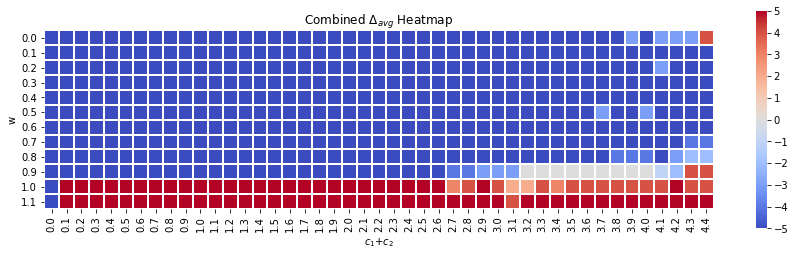

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame((sphere_avg_heatmap+rosen_avg_heatmap+rastrigin_avg_heatmap+griewank_avg_heatmap+schaffer_avg_heatmap), dtype="int"), square=True, linewidths=1, xticklabels=[x/10 for x in range(0, 45)],
              yticklabels=[x/10 for x in range(0, 12)], cbar_kws={"shrink": .4, "ticks": [-5,-4,-3,-2,-1,0,1,2,3,4,5]},cmap="coolwarm")
plt.title("Combined $\Delta_{aa}$ Heatmap".format(aa="{avg}"))
plt.xlabel("$c_1$+$c_2$")
plt.ylabel("w")

# $\Delta_{max}$ Heatmaps (Chapter 5.4)

In [28]:
os.makedirs("convergence_plots/heatmaps/delta_max")

In [29]:
def delta_max_average(function, fn_name):
    mat=np.zeros([12,45],dtype=np.ndarray)
    for i in range(0,12):
        for j in range(0,45):
            mat[i][j]=np.mean(function[2][i][j])
    flattened_list = [y for x in mat for y in x]
    for i in range(0,12):
        for j in range(0,45):
            mat[i][j]=min(mat[i][j],np.percentile(flattened_list,75))
    plt.figure(figsize=(15,10))
    sns.heatmap(pd.DataFrame(mat,dtype="float64"), square=True, linewidths=1, xticklabels=[x/10 for x in range(0, 45)],
                  yticklabels=[x/10 for x in range(0, 12)],cbar_kws={"shrink": .4},cmap="coolwarm")
    plt.title("{} $\Delta_{{max}}$ Heatmap".format(fn_name))
    plt.xlabel("$c_1$+$c_2$")
    plt.ylabel("w")
    plt.savefig("convergence_plots/heatmaps/delta_max/{}.png".format(fn_name))
    plt.clf()
    return mat

In [30]:
delta_max_average(sphere_all,"Sphere")
delta_max_average(rastrigin_all,"Rastrigin")
delta_max_average(griewank_all,"Griewank")
delta_max_average(rosen_all,"Rosenbrock")
delta_max_average(schaffer_all,"Schaffer")


array([[88.40288029673793, 1.7534835656401868, 1.8461439106745423,
        1.9412637498698402, 1.9803317355790537, 2.0125345894898135,
        2.1088788184632112, 2.090682672617889, 2.1874622553553618,
        2.1740339766035164, 2.2040291749699508, 2.2636669706024732,
        2.2972914972729606, 2.372274873446097, 2.3497602840673912,
        2.4149469208032284, 2.460730231977382, 5.29083432234405,
        2.552292258620667, 2.6176382619744727, 4.745805995468852,
        3.1457141242452433, 3.2358864900057025, 3.1449635964083558,
        3.1384852925392033, 3.1644861032250753, 3.1421815723413693,
        5.629013211235963e-09, 5.336005941159575e-09, 3.1393558351901536,
        1.8184009947455082, 8.225336426764207e-09, 6.287984101762875e-09,
        2.0321358564129035, 1.3786575827058757e-08, 5.371383991754843,
        4.862354854388754, 52.25484067141672, 9.075924832440744,
        88.40288029673793, 88.40288029673793, 88.40288029673793,
        88.40288029673793, 88.40288029673793, 8

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

#### combining delta_max for combined heatmap

In [31]:
## scaling delta max for combined heatmaps
def delta_max_scaled(function):
    mat=np.zeros([12,45],dtype=np.ndarray)
    for i in range(0,12):
        for j in range(0,45):
            mat[i][j]=np.mean(function[2][i][j])
    flattened_list = [y for x in mat for y in x]
    cap=np.percentile(flattened_list,75)
    minimum=min(flattened_list)
    maximum=cap
    for i in range(0,12):
        for j in range(0,45):
            mat[i][j]=(2*(min(mat[i][j],cap)-minimum)/(maximum-minimum))-1
    
    return mat

In [32]:
sphere_delta_max_scaled=delta_max_scaled(sphere_all)
rastrigin_delta_max_scaled=delta_max_scaled(rastrigin_all)
griewank_delta_max_scaled=delta_max_scaled(griewank_all)
rosen_delta_max_scaled=delta_max_scaled(rosen_all)
schaffer_delta_max_scaled=delta_max_scaled(schaffer_all)

Text(114,0.5,'w')

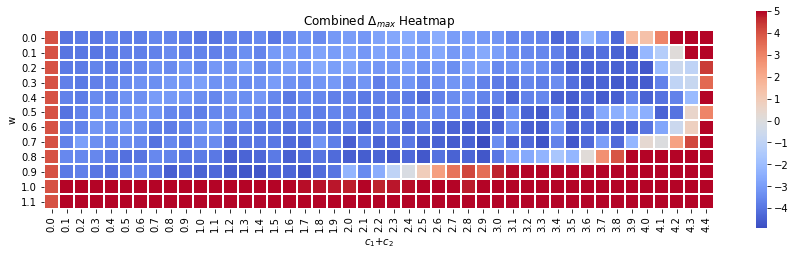

In [33]:
## delta_max combined
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame((sphere_delta_max_scaled+rastrigin_delta_max_scaled+griewank_delta_max_scaled+rosen_delta_max_scaled
                         +schaffer_delta_max_scaled),dtype="float64"), square=True, linewidths=1, xticklabels=[x/10 for x in range(0, 45)],
              yticklabels=[x/10 for x in range(0, 12)],cbar_kws={"shrink": .4,"ticks": [-5,-4,-3,-2,-1,0,1,2,3,4,5]},cmap="coolwarm")
plt.title("Combined $\Delta_{{max}}$ Heatmap")
plt.xlabel("$c_1$+$c_2$")
plt.ylabel("w")

### Saving plot of last 50 iterations delta max

## Combining heatmaps of both delta_avg and delta_max

Text(114,0.5,'w')

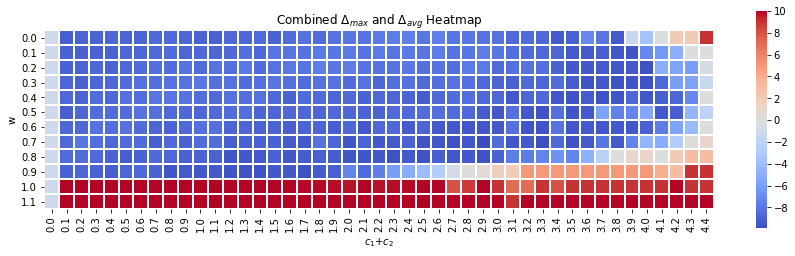

In [34]:
# both combined
## delta_max combined
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame((sphere_delta_max_scaled+rastrigin_delta_max_scaled+griewank_delta_max_scaled+rosen_delta_max_scaled
                         +schaffer_delta_max_scaled+sphere_avg_heatmap+rosen_avg_heatmap+rastrigin_avg_heatmap+griewank_avg_heatmap+schaffer_avg_heatmap),dtype="float64"), square=True, linewidths=1, xticklabels=[x/10 for x in range(0, 45)],
              yticklabels=[x/10 for x in range(0, 12)],cbar_kws={"shrink": .4,"ticks": [-10,-8,-6,-4,-2,0,2,4,6,8,10]},cmap="coolwarm")
plt.title("Combined $\Delta_{{max}}$ and $\Delta_{{avg}}$ Heatmap")
plt.xlabel("$c_1$+$c_2$")
plt.ylabel("w")

# $\Delta_{max}$ of last 50 iteration (Chapter 6)

In [35]:
def plot_printing(file,fn_name):
    plt.plot(np.array(range(1950,2000)),file[2][10][12])
    plt.title("{} $\Delta_{{max}}$ of last 50 iterations, (w,$c_1 + c_2$)= (1.0,1.2)".format(fn_name))
    plt.xlabel("nth Iteration")
    plt.ylabel("$\Delta_{max}$ Value")


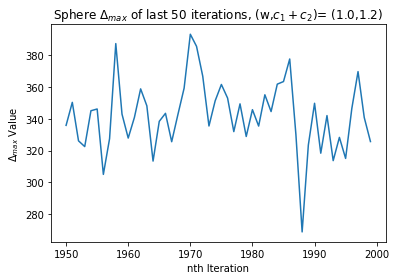

In [36]:
plot_printing(sphere_all,"Sphere")

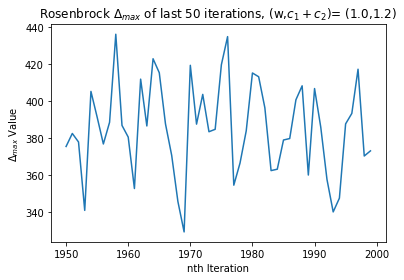

In [37]:
plot_printing(rosen_all,"Rosenbrock")

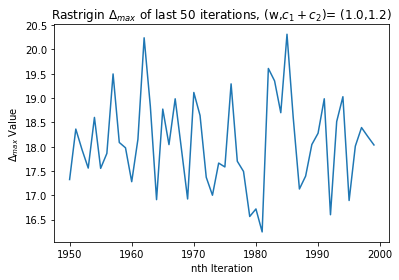

In [38]:
plot_printing(rastrigin_all,"Rastrigin")

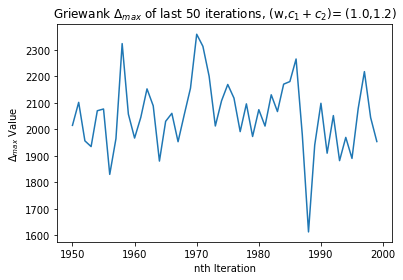

In [39]:
plot_printing(griewank_all,"Griewank")

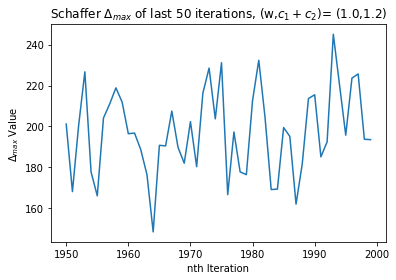

In [40]:
plot_printing(schaffer_all,"Schaffer")